In [1]:
from typing import List
import random
import numpy as np

import torch
from torch import optim
import matplotlib
import matplotlib.pyplot as plt
import math

from agent import CartPoleAgent
from schedules import EpsilonDecaySchedule

In [2]:
SEED = 10000
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)


In [3]:
eps_decay_schedule = EpsilonDecaySchedule(
    initial_value=0.9,
    final_value=0.05,
    decay_coefficient=1000
)

agent = CartPoleAgent(
    memory_size=10000,
    epsilon_schedule=eps_decay_schedule,
    tau=0.005
)

agent.init(
    optimizer=optim.AdamW(
        agent.policy_net_parameters(), 
        lr=1e-4, 
        amsgrad=True
    )
);

In [4]:
loss_history = agent.train(600, 128)

Training: 100%|██████████| 600/600 [00:38<00:00, 15.68episode/s, SmoothL1Loss=0.21]  


In [5]:
def plot_durations(
    episode_durations: List[int],
):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)

    plt.title('Result')
    plt.xlabel('Episode')
    plt.ylabel('Duration')

    plt.plot(durations_t.numpy())

    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if 'inline' in matplotlib.get_backend():
            display(plt.gcf())

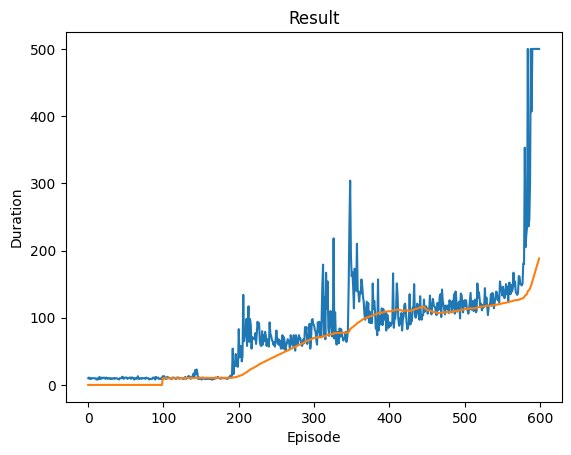

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
plot_durations(agent._episode_durations)

In [ ]:
# explore the effects of starting epsilon on the training process
# explore the effects of tau on the training process